##Análise e manipulação dos dados

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = '/content/drive/MyDrive/ic'
df = pd.read_csv(f'{path}/Dados limpos/resultados/complete_atributes_with_diag.csv')
df = df.iloc[:,1:]
df.head()

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,002_S_0295,CN,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN
1,002_S_0413,CN,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN
2,002_S_0559,CN,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,NaN,NaN,NaN,NaN
3,002_S_0619,AD,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,NaN,NaN,NaN,NaN
4,002_S_0685,CN,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 359 entries, Unnamed: 0.1 to rs17047502_2
dtypes: float64(7), int64(350), object(2)
memory usage: 2.1+ MB


**Lembrete**  
AD $\rightarrow$ Alzheimer Desease  
CN $\rightarrow$  Cognitively Normal  
MCI $\rightarrow$ Mild Cognitive Impairment

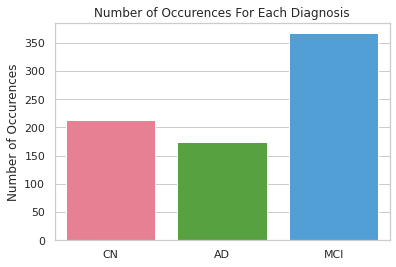

In [4]:
sns.set(style='whitegrid')
sns.countplot(x='Diags',data=df,palette='husl')
plt.title('Number of Occurences For Each Diagnosis')
plt.ylabel('Number of Occurences')
plt.xlabel('')
plt.savefig(f'{path}/Presentation/eachdiag.png')
plt.show()

In [5]:
df.iloc[533:534,:] #linha sem diagnostico

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
533,100_S_1226,NaN,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


In [6]:
df.drop(labels=533,inplace=True)
df.fillna(0, inplace = True)
df

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,002_S_0295,CN,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
1,002_S_0413,CN,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
2,002_S_0559,CN,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
3,002_S_0619,AD,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
4,002_S_0685,CN,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,941_S_1202,CN,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
753,941_S_1203,CN,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
754,941_S_1295,MCI,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0
755,941_S_1311,MCI,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0


In [7]:
y = df['Diags']
y = y.str.get_dummies()

In [13]:
y

,AD,CN,MCI
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
752,0,1,0
753,0,1,0
754,0,0,1
755,0,0,1


In [14]:
X = df.iloc[:,2:] #apenas os atributos
X.head(3)

,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,rs11084060_2,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


##Principal Component Analysis 

###PCA - com 1 classe Diags: AD = 1, CN = -1, MCI=0

In [15]:
df2 = df.iloc[:,1:]
df2.loc[df2['Diags']=='AD','Diags'] = 1
df2.loc[df2['Diags']=='CN','Diags'] = 0
df2.loc[df2['Diags']=='MCI','Diags'] = -1
df2.head(10)

,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
3,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
5,-1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0
6,-1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0.0,0.0,0.0,0.0
7,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0
8,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
9,-1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


In [16]:
from sklearn.decomposition import PCA
pca_2 = PCA()
pca_2.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca_data_2 = pca_2.transform(df2)

In [18]:
per_var_2 = np.round(pca_2.explained_variance_ratio_*100,decimals=1)
labels_2 = ['PC'+str(x) for x in range(1,len(per_var_2)+1)]

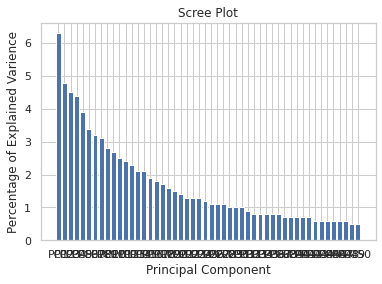

In [19]:
plt.bar(x=range(1,51), height=per_var_2[0:50],tick_label = labels_2[0:50])
plt.ylabel('Percentage of Explained Varience')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

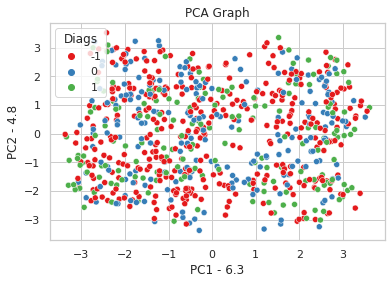

In [26]:
pca_df_2 = pd.DataFrame(pca_data_2,columns=labels_2)
sns.scatterplot(x = 'PC1', y = "PC2", data=pca_df_2, hue=df2["Diags"],palette= 'Set1')
plt.title('PCA Graph')
plt.xlabel(f'PC1 - {per_var_2[0]}')
plt.ylabel(f'PC2 - {per_var_2[1]}')
plt.show()

1. *Grande quantidade de PCs capturam muita informação*
2. *O eixo Y, que é o autovalor, mostra a quantidade de variação*
3. *Uma curva ideal seria abrupta e nela inseria indicado a quantidade de PCs para descrever os dados*

In [22]:
loading_scores_2 = pd.Series(pca_2.components_[0])
sorted_loading_scores_2 = loading_scores_2.abs().sort_values(ascending = False)
top_10_2 =  sorted_loading_scores_2[0:10].index.values
loading_scores_2[top_10_2]

303   -0.226892
27    -0.226302
33    -0.221673
30    -0.220271
53    -0.213686
35     0.200992
32     0.199591
17    -0.197806
246   -0.196632
20    -0.194461
dtype: float64

In [23]:
pca_df_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC319,PC320,PC321,PC322,PC323,PC324,PC325,PC326,PC327,PC328,PC329,PC330,PC331,PC332,PC333,PC334,PC335,PC336,PC337,PC338,PC339,PC340,PC341,PC342,PC343,PC344,PC345,PC346,PC347,PC348,PC349,PC350,PC351,PC352,PC353,PC354,PC355,PC356,PC357,PC358
0,-0.366410,1.397593,-1.736762,1.589265,-1.960020,-0.553931,1.884281,-2.148983,-1.090150,-0.540330,0.513408,0.614941,1.185246,0.602011,0.064950,-0.812643,-0.396185,-0.367209,-0.595669,0.511803,0.879265,-1.006557,-0.692485,1.214051,0.295884,-0.303867,0.095763,0.579006,1.678955,-0.030428,0.291960,0.509554,0.043051,-1.071562,-0.287949,0.990806,-0.216399,0.192869,-0.429742,-0.001660,...,3.191891e-16,-2.810252e-16,-6.314393e-16,-1.665335e-16,-1.994932e-16,1.110223e-16,-5.898060e-16,8.326673e-17,1.526557e-16,-2.775558e-17,2.671474e-16,1.942890e-16,-6.938894e-18,1.497825e-16,-7.216450e-16,3.955170e-16,-4.996004e-16,-1.179612e-16,2.185752e-16,-9.020562e-17,5.898060e-16,3.885781e-16,9.624103e-29,-2.958228e-31,2.081668e-16,-4.440892e-16,-3.191891e-16,-2.775558e-17,1.890849e-16,-1.387779e-16,1.804112e-16,5.048045e-16,1.387779e-17,-5.828671e-16,-6.245005e-17,5.959859e-16,6.245005e-17,-4.015885e-16,1.769418e-16,2.341877e-16
1,0.523258,2.619421,1.132758,-1.236704,0.839091,-1.034622,0.506514,0.113759,-2.622583,0.660866,1.203808,0.573836,1.124833,0.221926,-0.461650,0.549720,-0.960057,-0.219524,1.550452,-1.721162,0.432714,0.871939,-0.181100,-1.392007,-0.092303,-0.439565,1.407627,-0.498600,0.777438,0.357066,0.904791,-0.366271,-0.446486,-0.003385,0.508351,0.098941,-0.596273,0.900042,-1.487597,-0.412888,...,0.000000e+00,3.469447e-18,2.567391e-16,-7.494005e-16,-2.550044e-16,2.081668e-16,-1.040834e-16,-3.122502e-17,-1.942890e-16,-2.914335e-16,1.734723e-16,-1.110223e-16,1.179612e-16,6.294336e-16,-2.636780e-16,6.938894e-18,4.857226e-16,1.700029e-16,-9.367507e-17,2.775558e-17,5.204170e-16,-6.245005e-17,6.941976e-29,1.318877e-30,6.106227e-16,-1.873501e-16,1.804112e-16,-5.412337e-16,-5.152129e-16,6.383782e-16,-1.387779e-16,2.133710e-16,1.249001e-16,4.163336e-17,-2.775558e-17,-2.592327e-16,3.469447e-17,3.339343e-16,-5.412337e-16,-1.023487e-16
2,0.113376,-1.138689,2.675403,-0.698806,-2.177044,-1.116279,-0.625586,-0.784190,-1.880621,1.332152,-0.467750,-1.062107,0.809674,1.103166,-0.433655,1.424367,-0.504651,-0.594251,-0.435287,0.993000,0.513376,-0.056440,-0.274470,-0.034840,-0.783340,0.337665,-0.295338,-1.826725,0.098779,-0.468690,0.504809,-0.733185,0.175812,-0.037785,0.579929,0.416219,-0.865033,-0.157861,-0.092676,-0.312828,...,-5.828671e-16,1.873501e-16,-4.579670e-16,3.608225e-16,1.144917e-16,-1.387779e-17,-1.491862e-16,1.249001e-16,-1.387779e-16,1.387779e-17,1.040834e-16,-5.134781e-16,-1.266348e-16,-5.967449e-16,-1.734723e-16,1.249001e-16,-2.220446e-16,-4.163336e-17,1.561251e-16,-2.983724e-16,-2.775558e-17,-2.498002e-16,-3.470988e-29,3.328007e-31,2.220446e-16,-4.753142e-16,-1.665335e-16,-1.942890e-16,2.211772e-16,-1.249001e-16,-4.926615e-16,-9.714451e-17,2.012279e-16,-3.261280e-16,1.361758e-16,5.585810e-16,-2.775558e-16,-1.439820e-16,-1.873501e-16,-1.526557e-16
3,0.932278,0.547340,-2.149735,-1.855164,1.755508,-0.376651,-2.813670,0.609477,-0.876029,0.165433,1.423369,-0.018993,-0.040818,-0.177874,0.044142,-1.466994,-0.092501,-0.343942,-0.210524,-0.679267,-0.464653,0.617885,0.543674,-1.654151,0.337734,-0.466270,1.093312,-0.379436,1.122688,-0.392863,-2.008934,-0.131068,-0.089061,-0.129193,-0.421036,0.507002,-1.616080,-0.346330,0.295577,0.300381,...,-2.359224e-16,-1.040834e-16,-1.387779e-16,-4.996004e-16,-7.320533e-16,-3.469447e-16,1.769418e-16,-1.457168e-16,-5.967449e-16,1.526557e-16,3.235259e-16,-3.747003e-16,4.909267e-16,1.595946e-16,1.561251e-16,2.602085e-17,2.116363e-16,1.804112e-16,1.630640e-16,-8.673617e-17,-1.526557e-16,2.636780e-16,1.672385e-28,-5.053640e-31,-1.249001e-16,-4.753142e-16,3.191891e-16,-3.469447e-16,7.624110e

Avaliação: [How to read pca plots](https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/)

To deal with a not-so-ideal scree plot curve, there are a couple ways:

1. Kaiser rule: pick PCs with eigenvalues of at least 1.
2. Proportion of variance plot: the selected PCs should be able to describe at least 80% of the variance.

## Redução de dimensionalidade

## Regressão Logistica - One vs Rest (Alzheimer vs rest)

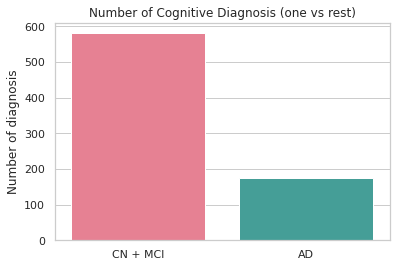

In [57]:
sns.set(style='whitegrid')
sns.countplot(x='AD',data=y,palette='husl')
plt.xticks(ticks = [0,1],labels=['CN + MCI','AD'])
plt.yticks( [x for x in range(0,601,100)] )
plt.xlabel('')
plt.ylabel('Number of diagnosis')
plt.title('Number of Cognitive Diagnosis (one vs rest)')
plt.savefig(f'{path}/Presentation/onevsrest.png')
plt.show()

###Divisão dos dados de treino e teste

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
X_train.head(3)

,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,rs11084060_2,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
541,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
632,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0
292,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,...,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0.0,0.0,0.0,0.0


In [60]:
y

,AD,CN,MCI
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
752,0,1,0
753,0,1,0
754,0,0,1
755,0,0,1


In [61]:
y_train_AD = y_train['AD']
y_test_AD = y_test['AD']
y_train_AD

541    0
632    0
292    1
732    0
182    1
      ..
461    0
188    0
514    0
202    0
212    0
Name: AD, Length: 567, dtype: int64

In [62]:
y['AD'].mean()

0.23148148148148148

###Treino, Predição e avaliação

In [63]:
lm = LogisticRegression(max_iter=1000,solver='saga')
lm.fit(X_train,y_train_AD)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_predict = lm.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Avaliações Regressão Logística (One vs Rest)")
print("------------------------------------------------------")
print('Score (Acurácia): ')
print(lm.score(X_test,y_test['AD']) )
print("------------------------------------------------------")
print('Precision Score (tp / (tp + fp)):')
print(precision_score(y_test_AD,y_predict))
print("------------------------------------------------------")
print('Recall Score (tp / (tp + fn)):')
print(recall_score(y_test_AD,y_predict))
print("------------------------------------------------------")
print('F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):')
print(f1_score(y_test_AD,y_predict))

Avaliações Regressão Logística (One vs Rest)
------------------------------------------------------
Score (Acurácia): 
0.7248677248677249
------------------------------------------------------
Precision Score (tp / (tp + fp)):
0.3103448275862069
------------------------------------------------------
Recall Score (tp / (tp + fn)):
0.21951219512195122
------------------------------------------------------
F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):
0.2571428571428571


### Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'specificity':make_scorer(recall_score,pos_label = 0)}

In [77]:
model1 = LogisticRegression(max_iter = 1000, solver="saga")
results1 = cross_validate(estimator = model,
                          X = X,
                          y= y['AD'],
                          cv = 10, 
                          scoring =scoring)

In [78]:
pd.DataFrame(results1).iloc[:,2:].sort_values(by="test_precision",ascending=False)

,test_accuracy,test_precision,test_recall,test_f1_score,test_specificity
7,0.800000,1.000000,0.117647,0.210526,1.000000
8,0.760000,0.428571,0.176471,0.250000,0.931034
3,0.736842,0.416667,0.277778,0.333333,0.879310
1,0.710526,0.375000,0.333333,0.352941,0.827586
5,0.710526,0.250000,0.111111,0.153846,0.896552
6,0.720000,0.166667,0.058824,0.086957,0.913793
4,0.697368,0.142857,0.055556,0.080000,0.896552
0,0.565789,0.055556,0.058824,0.057143,0.711864
2,0.684211,0.000000,0.000000,0.000000,0.896552
9,0.680000,0.000000,0.000000,0.000000,0.879310


In [79]:
print('Cross- Validation Scores: ')
print("------------------------------------------------------")
print('Score (Acurácia) with CV: ')
print(results1['test_accuracy'][7] )
print("------------------------------------------------------")
print('Precision Score (tp / (tp + fp)):')
print(results1['test_precision'][7])
print("------------------------------------------------------")
print('Recall Score (tp / (tp + fn)):')
print(results1['test_recall'][7])
print("------------------------------------------------------")
print('F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):')
print(results1['test_f1_score'][7])
print('Specificity')
print(results1['test_specificity'][7])

Cross- Validation Scores: 
------------------------------------------------------
Score (Acurácia) with CV: 
0.8
------------------------------------------------------
Precision Score (tp / (tp + fp)):
1.0
------------------------------------------------------
Recall Score (tp / (tp + fn)):
0.11764705882352941
------------------------------------------------------
F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):
0.21052631578947367
Specificity
1.0


## Regressão Logistica - One vs One (sem os casos Mild Cognitive Impairment (MCI))

###Divisão dos dados de treino e teste

In [ ]:
df3 = df2[df2['Diags']!=-1]
df3.head()

,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
3,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0


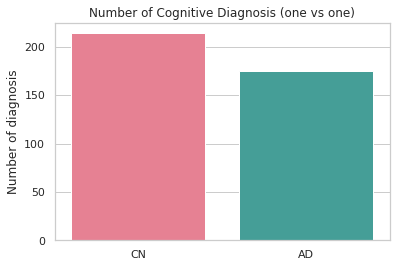

In [ ]:
sns.set(style='whitegrid')
sns.countplot(x='Diags',data=df3,palette='husl')
plt.xticks(ticks = [0,1],labels=['CN','AD'])
plt.yticks( [x for x in range(0,201,50)] )
plt.xlabel('')
plt.ylabel('Number of diagnosis')
plt.title('Number of Cognitive Diagnosis (one vs one)')
plt.show()

In [ ]:
X2 = df3.iloc[:,1:]
y2= df3['Diags'].astype(int)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

In [ ]:
X_train2.head(3)

In [ ]:
y_train2 = y_train2.astype('int')

###Treino, predição e avaliação

In [ ]:
lm = LogisticRegression(max_iter=1000, solver = "saga")
lm.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict2 = lm.predict(X_test2)
y_predict2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
len(X_test2)

98

In [ ]:
print("Avaliações Regressão Logística (One vs Rest)")
print("------------------------------------------------------")
print('Score (Acurácia): ')
print(lm.score(X_test2.astype('int'),y_test2.astype('int')) )
print("------------------------------------------------------")
print('Precision Score (tp / (tp + fp)):')
print(precision_score(y_test2.astype('int'),y_predict2.astype('int')))
print("------------------------------------------------------")
print('Recall Score (tp / (tp + fn)):')
print(recall_score(y_test2.astype('int'),y_predict2.astype('int')))
print("------------------------------------------------------")
print('F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):')
print(f1_score(y_test2.astype('int'),y_predict2.astype('int')))

Avaliações Regressão Logística (One vs Rest)
------------------------------------------------------
Score (Acurácia): 
0.5102040816326531
------------------------------------------------------
Precision Score (tp / (tp + fp)):
0.4878048780487805
------------------------------------------------------
Recall Score (tp / (tp + fn)):
0.425531914893617
------------------------------------------------------
F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):
0.4545454545454546


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [ ]:
model = LogisticRegression(max_iter = 1000, solver="saga")
results = cross_validate(estimator = model,
                          X = X2,
                          y= y2,
                          cv = 10, 
                          scoring =scoring)

In [ ]:
pd.DataFrame(results).iloc[:,2:].sort_values(by="test_precision",ascending=False)

,test_accuracy,test_precision,test_recall,test_f1_score
1,0.641026,0.571429,0.705882,0.631579
6,0.589744,0.571429,0.444444,0.500000
3,0.589744,0.555556,0.294118,0.384615
0,0.615385,0.550000,0.647059,0.594595
7,0.564103,0.545455,0.333333,0.413793
5,0.564103,0.529412,0.500000,0.514286
8,0.564103,0.520000,0.722222,0.604651
4,0.410256,0.352941,0.333333,0.342857
9,0.421053,0.333333,0.294118,0.312500
2,0.358974,0.277778,0.294118,0.285714


In [ ]:
print('Cross- Validation Scores: ')
print("------------------------------------------------------")
print('Score (Acurácia) with CV: ')
print(results['test_accuracy'][1] )
print("------------------------------------------------------")
print('Precision Score (tp / (tp + fp)):')
print(results['test_precision'][1])
print("------------------------------------------------------")
print('Recall Score (tp / (tp + fn)):')
print(results['test_recall'][1])
print("------------------------------------------------------")
print('F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):')
print(results['test_f1_score'][1])

Cross- Validation Scores: 
------------------------------------------------------
Score (Acurácia) with CV: 
0.6410256410256411
------------------------------------------------------
Precision Score (tp / (tp + fp)):
0.5714285714285714
------------------------------------------------------
Recall Score (tp / (tp + fn)):
0.7058823529411765
------------------------------------------------------
F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):
0.6315789473684211


####ROC AUC  SCORE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_score = cv.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test['AD'], y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test['AD'], y_score))

In [ ]:
plt.title('Receiver Operating Characteristic - ROC CURVE')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pca.transform(Xi)

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

##Regressão Logistíca Multinomial

###Divisão dos dados de treino e teste

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df2.iloc[:,1:], df2['Diags'])

In [ ]:
y_train3 = y_train3.astype(int)

X_train3.head(3)

,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,rs11084060_2,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
421,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
286,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
530,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


In [ ]:
y_train3.head(3)

421    1
286   -1
530    1
Name: Diags, dtype: int64

###Treino, predição e avaliação 

In [ ]:
multi_rl2 = LogisticRegression(multi_class='multinomial',solver='saga', max_iter=1000)

In [ ]:
multi_rl2.fit(X_train3,y_train3.astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict4 = multi_rl.predict(X_test3)
y_predict4

array([ 1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1,  0,  1, -1,  1,  1, -1, -1,  1,  1,  0, -1,  1, -1, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,  1, -1,
       -1, -1, -1,  0, -1,  0, -1, -1,  1,  1,  1, -1,  0, -1,  0, -1, -1,
        0,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  0,
       -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        0, -1,  0, -1,  1,  0,  1, -1, -1, -1, -1, -1,  1, -1,  1,  0,  0,
       -1,  1,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  1, -1, -1, -1,  0,
        0,  1, -1, -1,  0,  1, -1,  1, -1,  0, -1,  1,  1, -1, -1, -1,  0,
        1, -1,  0,  0, -1, -1, -1, -1,  1,  0,  1,  0,  0, -1, -1,  0, -1,
       -1,  0,  0, -1, -1,  0, -1, -1,  1, -1, -1,  1, -1, -1, -1,  0, -1,
       -1, -1])

In [ ]:
print("Avaliações Regressão Logística Multinomial (saga)")
print("------------------------------------------------------")
print('Score (Acurácia): ')
print(multi_rl2.score(X_test3.astype('int'),y_test3.astype('int')) )
print("------------------------------------------------------")
print('Precision Score (tp / (tp + fp)):')
print(precision_score(y_test3.astype('int'),y_predict4.astype('int'),average='macro'))
print("------------------------------------------------------")
print('Recall Score (tp / (tp + fn)):')
print(recall_score(y_test3.astype('int'),y_predict4.astype('int'),average='macro'))
print("------------------------------------------------------")
print('F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):')
print(f1_score(y_test3.astype('int'),y_predict4.astype('int'),average='macro'))

Avaliações Regressão Logística Multinomial (saga)
------------------------------------------------------
Score (Acurácia): 
0.4126984126984127
------------------------------------------------------
Precision Score (tp / (tp + fp)):
0.36902789123585017
------------------------------------------------------
Recall Score (tp / (tp + fn)):
0.3571736905070238
------------------------------------------------------
F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):
0.3577916046366632


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='macro')}

In [ ]:
df2['Diags']

In [ ]:
model2 = LogisticRegression(max_iter = 1000, solver="newton-cg")
results2 = cross_validate(estimator = model2,
                          X = df2.iloc[:,1:],
                          y= df2['Diags'].astype(int),
                          cv = 10, 
                          scoring =scoring )

In [ ]:
pd.DataFrame(results2).iloc[:,2:].sort_values(by="test_precision",ascending=False)

,test_accuracy,test_precision,test_recall,test_f1_score
3,0.578947,0.562687,0.516958,0.523647
8,0.466667,0.460317,0.423280,0.429365
6,0.480000,0.373488,0.395503,0.374158
1,0.394737,0.367843,0.375175,0.365595
7,0.373333,0.364066,0.320106,0.320008
5,0.381579,0.351662,0.349993,0.350531
4,0.394737,0.332115,0.330473,0.321932
9,0.360000,0.265970,0.284427,0.274725
0,0.289474,0.256860,0.245652,0.250097
2,0.328947,0.236869,0.254252,0.243447


In [ ]:
print('Cross- Validation Scores: ')
print("------------------------------------------------------")
print('Score (Acurácia) with CV: ')
print(results2['test_accuracy'][3] )
print("------------------------------------------------------")
print('Precision Score (tp / (tp + fp)):')
print(results2['test_precision'][3])
print("------------------------------------------------------")
print('Recall Score (tp / (tp + fn)):')
print(results2['test_recall'][3])
print("------------------------------------------------------")
print('F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):')
print(results2['test_f1_score'][3])

Cross- Validation Scores: 
------------------------------------------------------
Score (Acurácia) with CV: 
0.5789473684210527
------------------------------------------------------
Precision Score (tp / (tp + fp)):
0.5626869105129975
------------------------------------------------------
Recall Score (tp / (tp + fn)):
0.5169581346051935
------------------------------------------------------
F1 Score (F1 = 2 * (precision * recall) / (precision + recall) ):
0.5236473622576172


In [ ]:
y_test['AD'].sum()/y_test['AD'].count()

0.21164021164021163

####ROC AUC  SCORE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_score = cv.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test['AD'], y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test['AD'], y_score))

roc_auc_score for Logistic Regression:  0.5323825503355705


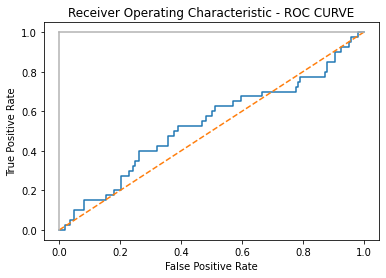

In [ ]:
plt.title('Receiver Operating Characteristic - ROC CURVE')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pca.transform(Xi)

array([[-0.36615992,  1.40049959, -1.7648892 ,  1.56316698, -1.96322434],
       [ 0.52440705,  2.62275719,  1.14711534, -1.23252493,  0.82703569],
       [ 0.11152739, -1.13206011,  2.70906422, -0.60305284, -2.15929097],
       ...,
       [ 1.94624457,  1.88140624,  1.88324227, -0.76209555, -1.37496997],
       [ 1.63953477, -1.35921637, -0.61080159,  3.9758018 , -1.22618787],
       [-1.64658795, -1.23353578, -0.08844317,  1.63777341,  3.12360194]])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.06391307, 0.11263197, 0.15766683, 0.20158566, 0.24091203])

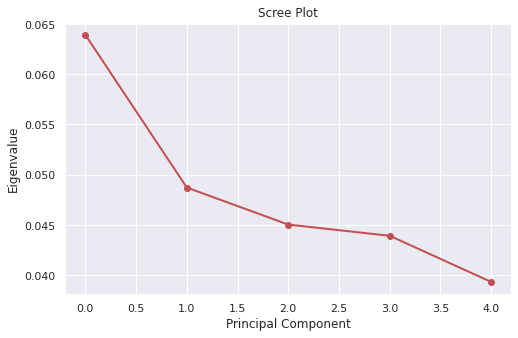

In [ ]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()